# Exploratory data anlysis and Feature Engineering

In [146]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm


# Files 
x_train_csv = "dataset/x_train.csv"
y_train_csv = "dataset/y_train.csv"


# Own functions
from real_implementations import *

In [147]:
# Converting the CSV files into a DataFrame
df_x = pd.read_csv(x_train_csv)
df_y = pd.read_csv(y_train_csv)
# Merging both df
df_train = df_x.merge(df_y, on='Id', how='left')
df_train.head()

,Id,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,...,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3,_MICHD
0,0,53,11,11162015,11,16,2015,1100,2015015629,2015015629,...,1,3.0,3.0,4.0,1,1,NaN,NaN,2.0,-1
1,1,33,12,12152015,12,15,2015,1200,2015004387,2015004387,...,9,3.0,3.0,4.0,9,9,NaN,NaN,NaN,-1
2,2,20,10,10202015,10,20,2015,1100,2015005638,2015005638,...,2,2.0,2.0,3.0,1,1,1.0,2.0,2.0,-1
3,3,42,6,6182015,6,18,2015,1100,2015004694,2015004694,...,2,2.0,2.0,3.0,1,1,2.0,2.0,2.0,-1
4,4,24,11,11062015,11,6,2015,1100,2015004673,2015004673,...,9,3.0,3.0,4.0,1,1,9.0,9.0,2.0,-1


## i. Dimensions of data 
- 322 features
- 328135 samples in training set, which will also be used for cross-validation

In [3]:
print(list(df_train.columns))
p = len(list(df_train.columns))
print(f'Number of parameters: {p-1}')
N = df_train.shape[0]
print(f'Number of samples : {N}')

['Id', '_STATE', 'FMONTH', 'IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'DISPCODE', 'SEQNO', '_PSU', 'CTELENUM', 'PVTRESD1', 'COLGHOUS', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CTELNUM1', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CCLGHOUS', 'CSTATE', 'LANDLINE', 'HHADULT', 'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'POORHLTH', 'HLTHPLN1', 'PERSDOC2', 'MEDCOST', 'CHECKUP1', 'BPHIGH4', 'BPMEDS', 'BLOODCHO', 'CHOLCHK', 'TOLDHI2', 'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3', 'DIABAGE2', 'SEX', 'MARITAL', 'EDUCA', 'RENTHOM1', 'NUMHHOL2', 'NUMPHON2', 'CPDEMO1', 'VETERAN3', 'EMPLOY1', 'CHILDREN', 'INCOME2', 'INTERNET', 'WEIGHT2', 'HEIGHT3', 'PREGNANT', 'QLACTLM2', 'USEEQUIP', 'BLIND', 'DECIDE', 'DIFFWALK', 'DIFFDRES', 'DIFFALON', 'SMOKE100', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'USENOW3', 'ALCDAY5', 'AVEDRNK2', 'DRNK3GE5', 'MAXDRNKS', 'FRUITJU1', 'FRUIT1', 'FVBEANS', 'FVGREEN', 'FVORANG', 'VEGETAB1', 'EXERANY2', 'EXR

## ii. Checking for data imbalances in labels distribution
- y: Patient gas suffered myocardial Infarct or Coronary Heart Disease (MICHD) 
     - -1 -> No
     - 1 -> Yes

- Clearly imbalanced data. Perhaps it will be necessary to apply certain strategies to mitifate uneven distribution of levels:
    - Resampling: Use oversampling  or undersampling to balance your data.
    - Class Weights: Adjust the weights in your model to handle the imbalance.
    - Adjust threshold of logistic regression



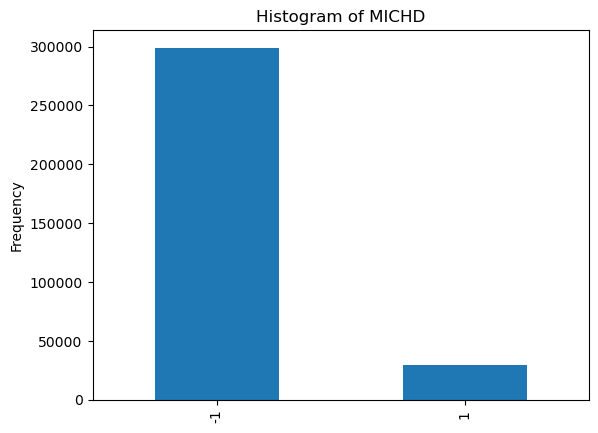

In [4]:
df_train['_MICHD'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('Frequency')
plt.title('Histogram of MICHD')
plt.show()

## iii. Handling misssing data

In [5]:
# Numerous columns with missing data entries
print(list(df_train.isnull().sum()))
# Count the number of rows with at least one missing value
rows_with_missing = df_train.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing}") # All samples miss some value

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 139415, 139415, 328103, 139416, 139415, 328103, 139433, 139524, 139525, 188720, 188720, 188721, 188720, 327334, 188719, 189287, 192544, 2, 1, 0, 159860, 0, 0, 1, 1, 1, 196334, 0, 43801, 43801, 0, 0, 284153, 1, 0, 0, 1, 0, 0, 5, 285915, 0, 0, 0, 0, 139415, 318245, 139415, 1, 0, 3, 2471, 3207, 3946, 4407, 279663, 6933, 7743, 8293, 8728, 9149, 9432, 9862, 10541, 191379, 282510, 237369, 11007, 11765, 170906, 171212, 171522, 20738, 21567, 22468, 23149, 23759, 24502, 26205, 107829, 109141, 109407, 109690, 181261, 181400, 28647, 226907, 227043, 227197, 229088, 29911, 30600, 186763, 186001, 31022, 32080, 243418, 243561, 266689, 266689, 306425, 306426, 306428, 306429, 306429, 306629, 306429, 306430, 306430, 247299, 310302, 310320, 310346, 310367, 310392, 310403, 310450, 265347, 325762, 325769, 325769, 327339, 326264, 325775, 325777, 325777, 325780, 241493, 318477, 318489, 325051, 318505, 318515, 297518, 309300, 297543, 327354, 327645, 327907, 327907, 327648, 32764

Should features with many missing values be dropped?

In [6]:
# Calculate the percentage of missing values per column
missing_percentage = df_train.isnull().mean() * 100

# Display columns with more than given percentage missing values
threshold_missing_percentage = 90
cols_to_drop = missing_percentage[missing_percentage > threshold_missing_percentage].index
print(cols_to_drop)
print(len(cols_to_drop)) # 147 out of 322 features

# Initial approach substitute missing values with zeros
# Perhaps in logistic regression can convey that 0 doesn't communicate information
df_train.fillna(0, inplace=True)

Index(['COLGHOUS', 'LADULT', 'CCLGHOUS', 'NUMPHON2', 'INSULIN', 'BLDSUGAR',
       'FEETCHK2', 'DOCTDIAB', 'CHKHEMO3', 'FEETCHK', 'EYEEXAM', 'DIABEYE',
       'DIABEDU', 'CRGVREL1', 'CRGVLNG1', 'CRGVHRS1', 'CRGVPRB1', 'CRGVPERS',
       'CRGVHOUS', 'CRGVMST2', 'VIDFCLT2', 'VIREDIF3', 'VIPRFVS2', 'VINOCRE2',
       'VIEYEXM2', 'VIINSUR2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDHOUSE',
       'CDASSIST', 'CDHELP', 'CDSOCIAL', 'CDDISCUS', 'WTCHSALT', 'LONGWTCH',
       'DRADVISE', 'ASTHMAGE', 'ASATTACK', 'ASERVIST', 'ASDRVIST', 'ASRCHKUP',
       'ASACTLIM', 'ASYMPTOM', 'ASNOSLEP', 'ASTHMED3', 'ASINHALR', 'HAREHAB1',
       'STREHAB1', 'CVDASPRN', 'ASPUNSAF', 'RLIVPAIN', 'RDUCHART', 'RDUCSTRK',
       'ARTTODAY', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'TETANUS', 'HPVADVC2',
       'HPVADSHT', 'SHINGLE2', 'HADMAM', 'HOWLONG', 'HADPAP2', 'LASTPAP2',
       'HPVTEST', 'HPLSTTST', 'HADHYST2', 'PROFEXAM', 'LENGEXAM', 'LSTBLDS3',
       'HADSGCO1', 'LASTSIG3', 'PCPSAAD2', 'PCPSADI1', 'PCPSARE1', 'PS

In [7]:
# Droppping columns
# For now, dont drop
#df_train = df_train.drop(columns=cols_to_drop)

## iv. Distributions of features

Through correlation matrix, can visualize highly correlated variables with the label:
 - We will drop features with low correlation
 - We will drop feaures which are lighly correlated with eah other -> Redundant information

**Initial approach**
- Start with approx. 10 features and increase progressively threshold for correlation and check performance

In [8]:
# Compute correlation matrix for numerical features
corr_matrix = df_train.corr()

Distribution of correlation values with respect to label

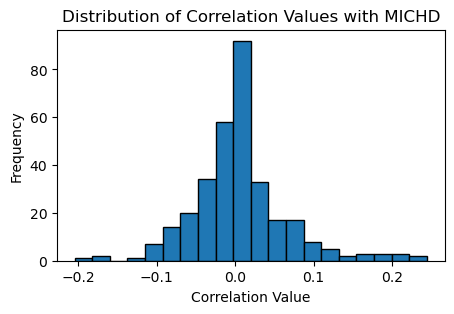

In [9]:
# Extract correlation values with respect to 'MICHD'
correlation_label= corr_matrix['_MICHD']
correlation_label = correlation_label.drop('_MICHD') # don't compare with itself -> 1

# Plot a histogram to visualize the distribution of correlation values
plt.figure(figsize=(5,3))
plt.hist(correlation_label, bins=20, edgecolor='k')
plt.title('Distribution of Correlation Values with MICHD')
plt.xlabel('Correlation Value')
plt.ylabel('Frequency')
plt.show()



i. Filter features which are highly correlated between them
 - Only need to check upper half of correlation matrix; otherwise oth features would be eliminated

In [10]:
# Set the correlation threshold
intercorrelation_threshold = 0.8

# Select the upper triangle of the correlation matrix
# i. Create matrix with only ones in upper triangular part ( no diagonal)
triangular_matrix = np.triu(np.ones(corr_matrix.shape), k=1) # k=1 -> so diagonal is excluded
# All values with 0 -> evaluated to false, so you get just upper triangular of correlation matrix
upper_triangle = corr_matrix.where(triangular_matrix.astype(bool))

# Find index pairs where correlation is greater than the threshold
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > intercorrelation_threshold)]
print(f'Num of high correlated features: {len(high_corr_features)}')
print(f"Features to drop due to high correlation: {high_corr_features}")


Num of high correlated features: 104
Features to drop due to high correlation: ['IDATE', 'IMONTH', '_PSU', 'PVTRESD1', 'STATERES', 'CELLFON3', 'LADULT', 'NUMADULT', 'NUMMEN', 'NUMWOMEN', 'CELLFON2', 'CADULT', 'PVTRESD2', 'CSTATE', 'LANDLINE', 'NUMHHOL2', 'ARTHSOCL', 'EYEEXAM', 'DIABEYE', 'DIABEDU', 'CRGVPERS', 'CRGVHOUS', 'CRGVMST2', 'VIREDIF3', 'VIEYEXM2', 'VICTRCT4', 'VIGLUMA2', 'VIMACDG2', 'CDASSIST', 'CDSOCIAL', 'CDDISCUS', 'DRADVISE', 'ASACTLIM', 'ASINHALR', 'ASPUNSAF', 'ARTHWGT', 'ARTHEXER', 'ARTHEDU', 'HADPAP2', 'HADHYST2', 'HADSIGM3', 'LASTSIG3', 'PCPSADI1', 'PCPSARE1', 'PSATEST1', 'SCNTMEL1', 'SCNTWRK1', 'RCSRLTN2', 'CASTHDX2', 'LSATISFY', 'ADDOWN', 'ADEAT1', 'ADFAIL', 'ADTHINK', 'ADMOVE', 'MISTMNT', 'ADANXEV', 'QSTVER', '_STSTR', '_RAWRAKE', '_WT2RAKE', '_CPRACE', '_MRACE1', '_RACEGR3', '_AGE65YR', '_AGE80', '_AGE_G', 'HTM4', '_BMI5', '_BMI5CAT', '_EDUCAG', '_INCOMG', 'DROCDY3_', '_RFBING5', '_DRNKWEK', '_RFDRHV5', '_MISVEGN', '_FRUTSUM', '_FRTLT1', '_VEGLT1', '_FRUITEX', '_V

In [11]:
# Drop the feautures
df_no_colinear = df_train.drop(columns=high_corr_features)

ii. Filter features with absolute correlation greater than threshold

In [12]:
# Compute again correlation matrix without colinearity
corr_matrix = df_no_colinear.corr()
correlation_label= corr_matrix['_MICHD']
correlation_label = correlation_label.drop('_MICHD') # don't compare with itself -> 1


In [221]:

correlation_label_threshold = 0.15
high_corr_features = correlation_label[correlation_label.abs() > correlation_label_threshold]

# Get the number of features with correlation > threshold
num_high_corr_features = len(high_corr_features)

print(f"Number of features with correlation > {correlation_label_threshold}: {num_high_corr_features}")


# Select features with absolute correlation greater than the threshold
selected_features = high_corr_features.index.tolist()
# Only retain those in df
# Add the label to the list of selected features
final_features = selected_features + ['_MICHD']
# Ensure the index is kept automatically
df_selected_features = df_no_colinear[final_features]

Number of features with correlation > 0.15: 11


In [99]:
df_selected_features.head()

,GENHLTH,BPHIGH4,BPMEDS,CVDSTRK3,HAVARTH3,DIABETE3,DIABAGE2,EMPLOY1,CHILDREN,INTERNET,...,ARTHDIS2,INSULIN,HAREHAB1,_RFHLTH,_HCVU651,_RFHYPE5,_RFCHOL,_DRDXAR1,_AGEG5YR,_MICHD
0,2.0,3.0,0.0,2,2.0,3.0,0.0,1,88.0,1.0,...,0.0,0.0,0.0,1,1,1,1.0,2.0,8,-1
1,4.0,1.0,1.0,2,2.0,3.0,0.0,1,88.0,2.0,...,0.0,0.0,0.0,2,1,2,1.0,2.0,8,-1
2,2.0,3.0,0.0,2,1.0,3.0,0.0,1,88.0,1.0,...,2.0,0.0,0.0,1,9,1,2.0,1.0,10,-1
3,1.0,3.0,0.0,2,1.0,3.0,0.0,7,88.0,2.0,...,2.0,0.0,0.0,1,9,1,1.0,1.0,10,-1
4,2.0,3.0,0.0,2,2.0,3.0,0.0,9,88.0,1.0,...,0.0,0.0,0.0,1,9,1,1.0,2.0,14,-1


## iv. Feature distribution

- Variables selected
  - GENHELTH: health status; subjective, asked to patient; discrete; 
        - 1(excellent)-5(poor); 7, 9, blank: no info
  - BPHIGH4: Have you EVER been told by a doctor, nurse or other health professional that you have high blood pressure? (If "Yes" and respondent is female, ask "Was this only when you were pregnant?".)
        - discrete: 1-4; 7, 9, blanck: no info
- BPMEDS: Are you currently taking medicine for your high blood pressure?
        - Binary: 1-yes, 2-no; 7,9, black: no info
- DIABETE 3: (Ever told) you have diabetes (If "Yes" and respondent is female, ask "Was this only when you were pregnant?".
         - DIscrete; 1-4;  7,9, black: no info
- DIABAGE 2: How old were you when you were told you have diabetes?
         - Cont, 1-97; no info: 98,99, blank
- EMPLOY1: mployment status
          - DIscrete: 1-8; 9: no info
- _RFHLTH: adults with poor or good health
           - Binary: 1: good health; 2: fair/poor; 9: no info
- : _HCVU651: Respondents aged 18-64 who have any form of health care coverage
            - Binary: 1: coverage, 2: no; 9: no info
- : _RFHYPE5: Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional
           - bINARY; 1:no, 2: yes; 9:  no info
- _DRDXAR1: Respondents who have had a doctor diagnose them as having some form of arthritis
     - bINARY; 1-yes; 2-no; blanck: no info
- _AGE5GYR: 14 bins age
       - discrte: 1-13; 14: no info

- DIABAGE 2 -> Almost no info : could drop?

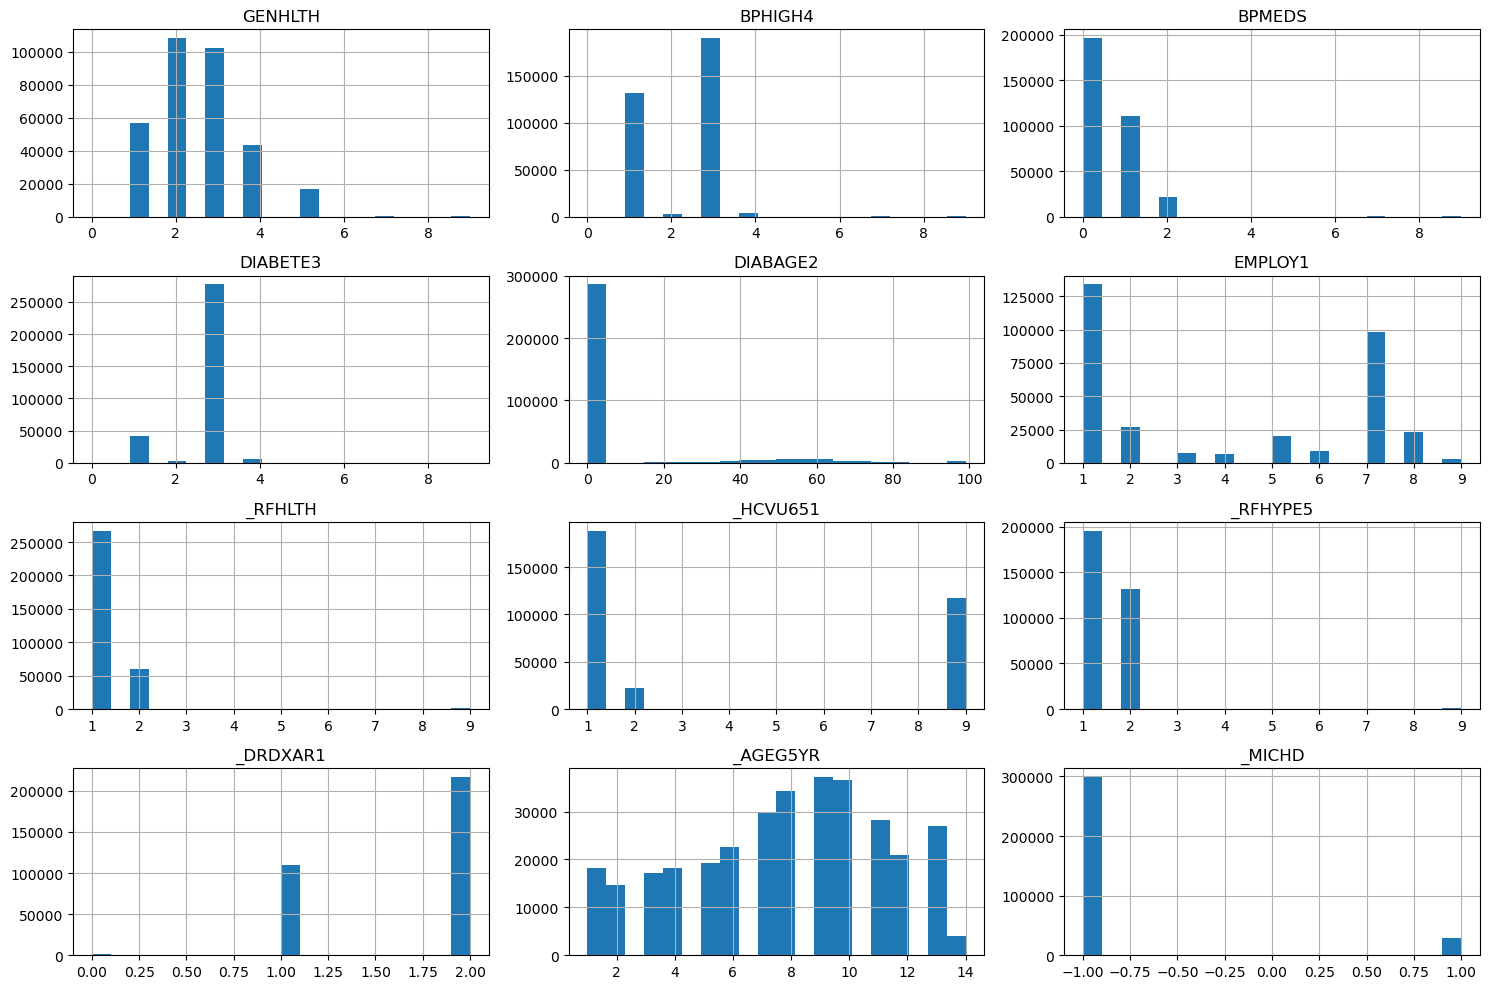

In [17]:
# Plot histograms for all columns
df_selected_features.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [18]:
# Drop DIABAGE2
#df_selected_features = df_selected_features.drop('DIABAGE2') 


Could add interaction terms?

# II. Setting up regression model

- Strategy setting up baseline model and increase complexity 
   - i. Reduced number of features: 10 vs 20 vs whole set

- Doing K-fold validation
- Will keep track of error with iterations
- 1. Try without regularization
- Also try learning rate scheduler

i. Creation datasets

In [222]:
df = df_selected_features
df['_MICHD'] = df['_MICHD'].replace(-1, 0)  # Convert -1 to 0

C:\Users\beaiz\AppData\Local\Temp\ipykernel_28904\1378305418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['_MICHD'] = df['_MICHD'].replace(-1, 0)  # Convert -1 to 0


Balancing dataset

In [226]:
# Step 1: Separate the classes
df_class_1 = df[df['_MICHD'] == 1]
df_class_0 = df[df['_MICHD'] == 0]

# Step 2: Get the number of samples for class 1
num_class_1 = len(df_class_1)

# Step 3: Sample the same number of samples from class 0
df_class_0_sampled = df_class_0.sample(n=num_class_1, random_state=42)  # Randomly sample from class 0

# Step 4: Combine the sampled DataFrames
df_balanced = pd.concat([df_class_0_sampled, df_class_1])

# Now extract X and y from the balanced DataFrame
X = df_balanced.drop(columns=['_MICHD']).to_numpy()
y = df_balanced['_MICHD'].to_numpy()

# Print the shapes to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (57950, 11)
Shape of y: (57950,)


In [223]:
# DATASET in df
# Restructuring as arrays
X = df.drop(columns=['_MICHD']).to_numpy()
y = df['_MICHD'].to_numpy()



In [106]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Select features based on importance
indices = np.argsort(importances)[::-1]  # Sort features by importance
print("Feature ranking:")

for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {indices[f]} (importance: {importances[indices[f]]})")

Feature ranking:
1. Feature 0 (importance: 0.06771114432416576)
2. Feature 60 (importance: 0.0640883085747317)
3. Feature 59 (importance: 0.03815782616602479)
4. Feature 3 (importance: 0.03406942017151008)
5. Feature 4 (importance: 0.033190214514894664)
6. Feature 32 (importance: 0.031944011871563316)
7. Feature 18 (importance: 0.028542582704707987)
8. Feature 21 (importance: 0.02774213382565708)
9. Feature 62 (importance: 0.027670659932599925)
10. Feature 63 (importance: 0.02613662612843266)
11. Feature 33 (importance: 0.02534555570339153)
12. Feature 36 (importance: 0.02472650103712655)
13. Feature 9 (importance: 0.024197523737777442)
14. Feature 52 (importance: 0.02359235340444082)
15. Feature 16 (importance: 0.0213747123784602)
16. Feature 57 (importance: 0.019009249986321815)
17. Feature 65 (importance: 0.017446647796251324)
18. Feature 37 (importance: 0.017240723859566248)
19. Feature 53 (importance: 0.016278938027601247)
20. Feature 7 (importance: 0.015731028682900303)
21. Featu

In [101]:
X

array([[ 2.,  3.,  0., ...,  1.,  2.,  8.],
       [ 4.,  1.,  1., ...,  1.,  2.,  8.],
       [ 2.,  3.,  0., ...,  2.,  1., 10.],
       ...,
       [ 3.,  3.,  0., ...,  2.,  2., 10.],
       [ 3.,  3.,  0., ...,  1.,  2.,  5.],
       [ 2.,  1.,  2., ...,  1.,  1.,  7.]])

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss



# Split the dataset into training and testing sets (90% train, 10% test)
x_tr, x_te, y_tr, y_te = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(class_weight='balanced',max_iter=100, solver='liblinear')

# Fit the model
model.fit(x_tr, y_tr)

# Predict probabilities for the test set
y_pred_proba = model.predict_proba(x_te)[:, 1]  # Get probabilities for the positive class
y_pred_tr = model.predict_proba(x_tr)[:, 1]
# Calculate log loss
loss_test = log_loss(y_te, y_pred_proba)
loss_train = log_loss(y_tr, y_pred_tr)
print(f'Log Loss Test: {loss_test}')
print(f'Log Loss Train: {loss_train}')




Log Loss Test: 0.5075081542953762
Log Loss Train: 0.506871535496287


In [71]:
np.shape(y)
N = np.shape(y)[0] # number of samples
random_index = np.random.permutation(N)

In [128]:
def logistic_regression(y_tr, x_tr, y_te, x_te, initial_w, max_iters, gamma):
    """
    Logistic regression using GD; keeping track of loss at each iteration
    Logistic regression: predicts probability of belonging to binary class -> 0,1
                         The linear combination of x and w goes through sigmoid -> 0/1
    However, loss function and gradient now follow different expressions (than for conventional linear regression)
    """
    N_tr = np.shape(y_tr)[0]
    #print(f"Training set size: {len(y_tr)}, Test set size: {len(y_te)}")
    w = initial_w
    losses_train = []
    losses_test = []
    for n_iter in range(max_iters):
        # Prediction
        y_pred = sigmoid(x_tr @ w)
        
        # Compute gradient
        gradient = compute_gradient_log_loss(y_tr, y_pred, x_tr, N_tr)
        # Update w by gradient
        w = w - gamma * gradient
        # Compute loss for train and test data
        losses_train.append(compute_log_loss(y_tr, sigmoid(x_tr @ w)))
        losses_test.append(compute_log_loss(y_te, sigmoid(x_te @ w)))
    
    return w, losses_train, losses_test
def compute_gradient_log_loss(y, y_pred, tx, N):
    gradient = tx.T @ (y_pred - y) / N  # Normalize by N
    return gradient
def compute_log_loss(y, y_pred):
    """Calculate the loss according to log loss
    Args:
        y: numpy array of shape=(N, )
        y_pred: prediction vector of shape= (N,)

    Returns:
        the value of the loss (a scalar), corresponding to the prediction vector.
    """
    # Add small epsilon to log to avoid overflow in case of log(0)
    # Use * for element-wise multiplication
    N = np.shape(y)[0]
    loss = (
        np.sum(-(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))) / N
    )
    return loss

In [176]:

def build_k_indices(y, k_fold, seed):
    """build k indices for k-fold.

    Args:
        y:      shape=(N,)
        k_fold: K in K-fold, i.e. the fold num
        seed:   the random seed

    Returns:
        A 2D array of shape=(k_fold, N/k_fold) that indicates the data indices for each fold
        # For each row one fold, where elements are elements per fold (indicated by indices)

    >>> build_k_indices(np.array([1., 2., 3., 4.]), 2, 1)
    array([[3, 2],
           [0, 1]])
    """
    num_row = y.shape[0]  # number of samples
    interval = int(num_row / k_fold)  # number of samples per row
    np.random.seed(seed)
    indices = np.random.permutation(
        num_row
    )  # create array with N elements from 0...N, shuffled

    # Group indices into arrays: do it K times ( so K folds)
    # take indices[0:i]; where i num of samples per fold; iteratively
    k_indices = [indices[k * interval : (k + 1) * interval] for k in range(k_fold)]
    return np.array(k_indices)


def cross_validation(y, x, k_indices, k, initial_w, max_iters, gamma):
    """return the loss for a fold (only for one FOLD) corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        initial_w:  initial weights
    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # get k'th subgroup in test, others in train
    # Once have k folds, separate k -1 into train and leave one for test
    # Ex: choose k for test and remaining for training

    idx_te = k_indices[k]
    idx_tr = k_indices[
        np.arange(len(k_indices)) != k
    ].flatten()  # array with all indices in K_indices but kth
    y_te = y[idx_te]
    x_te = x[idx_te]
    y_tr = y[idx_tr]
    x_tr = x[idx_tr]

    # ridge regression:
    w, losses_tr, losses_te = logistic_regression(
        y_tr, x_tr, y_te, x_te, initial_w, max_iters, gamma
    )
    # ***************************************************
    return losses_tr, losses_te, w


def logistic_regression(y_tr, x_tr, y_te, x_te, initial_w, max_iters, gamma):
    """
    Logistic regression using GD; keeping track of loss at each iteration
    Logistic regression: predicts probability of belonging to binary class -> 0,1
                         The linear combination of x and w goes through sigmoid -> 0/1
    However, loss function and gradient now follow different expressions (than for conventional linear regression)
    """
    N_tr = np.shape(y_tr)[0]
    w = initial_w
    losses_train = []
    losses_test = []
    # Augmenting data 
    
    for n_iter in range(max_iters):
        # Prediction
        y_pred = sigmoid(x_tr @ w)
        # Return loss at last iteration
        losses_train.append(compute_log_loss(y_tr, y_pred))
        # Compute gradient
        gradient = compute_gradient_log_loss(y_tr, y_pred, x_tr, N_tr)
        # Update w by gradient
        w = w - gamma * gradient
        # Compute loss for test data
        losses_test.append(compute_log_loss(y_te, sigmoid(x_te @ w)))
    return w, losses_train, losses_test


# Additional methods for implementations


def compute_log_loss(y, y_pred):
    """Calculate the loss according to log loss
    Args:
        y: numpy array of shape=(N, )
        y_pred: prediction vector of shape= (N,)

    Returns:
        the value of the loss (a scalar), corresponding to the prediction vector.
    """
    # Add small epsilon to log to avoid overflow in case of log(0)
    # Use * for element-wise multiplication
    N = np.shape(y)[0]
    loss = (
        np.sum(-(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))) / N
    )
    return loss


def sigmoid(z):
    """
    Implementation of sigmoid function for logistic regression
    Arg:
       z: 1D array of N
    Return:
       1D array with N entries with values between 0 and 1
    """
    return 1 / (1 + np.exp(-z))


def compute_gradient_log_loss(y, y_pred, tx, N):
    gradient = tx.T @ (y_pred - y) / N  # Normalize by N
    return gradient


def compute_MSE_loss(error, N, loss_type="MSE"):
    """Calculate the loss using either MSE (default), or RMSE.
    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    loss = np.sum((error) ** 2) / (2 * N)
    if loss_type == "RMSE":
        loss = np.sqrt(loss)
    return loss

def F1_score_f(y_true, y_pred,plot=True):
    """
    Compute the confusion matrix for binary classification and plot it; and return F1 score

    Args:
        y_true (array-like): True labels (0 or 1).
        y_pred (array-like): Predicted labels (0 or 1).

    Returns:
        tuple: (TP, TN, FP, FN) and plot of the confusion matrix.
    """
    # Initialize counts
    N = np.shape(y_true)[0]
    TP = TN = FP = FN = 0

    # Count TP, TN, FP, FN
    for true, pred in zip(y_true, y_pred):
        if true == 1 and pred == 1:
            TP += 1  # True Positive
        elif true == 0 and pred == 0:
            TN += 1  # True Negative
        elif true == 0 and pred == 1:
            FP += 1  # False Positive
        elif true == 1 and pred == 0:
            FN += 1  # False Negative
    if plot:
  
        # Create confusion matrix
        cm = np.array([[TN, FP],
                    [FN, TP]])
        
        # Plotting
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    linewidths=.5, linecolor='black', 
                    vmin=0, vmax=np.max(cm),  # Set saturation based on max value
                    alpha=0.7)  # Transparency for low values
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.xticks(ticks=[0.5, 1.5], labels=['0', '1'])
        plt.yticks(ticks=[0.5, 1.5], labels=['0', '1'])
        plt.show()
        # F1 score

        '''
        # Normalize values        
        TP /= N
        TN /= N
        FN /= N
        FP /= N
        '''

    return (2*TP)/(2*TP+FP+FN)



In [186]:
def plot_loss_iter(losses_train, losses_test, max_iters, gamma):
    plt.figure(figsize=(7, 3))
    plt.loglog(range(max_iters), losses_train, label='Training Loss', color='blue', marker='o')
    plt.loglog(range(max_iters), losses_test, label='Test Loss', color='red', marker='x')
    plt.title(f'Learning rate: {gamma}')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

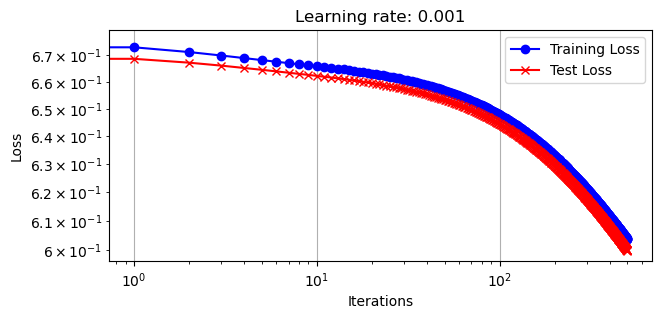

In [227]:
# Dummy try : printing test/ train MSE with respect to iterations
# Initial weights
p = 11 # number of selected parameters
initial_w =  np.random.rand(p) * 0.01  # Small random values
max_iters = 500
gamma = 0.001
N = np.shape(y)[0] # number of samples
random_index = np.random.permutation(N)
# Proportion trainig: 0.9; test: 0.1´
N_train = round(0.9 * N)
training_index = random_index[:N_train]
test_index = random_index[N_train:]
x_tr = X[training_index]
x_te = X[test_index]
y_tr = y[training_index]
y_te = y[test_index]
w, losses_train, losses_test = logistic_regression(y_tr, x_tr, y_te, x_te, initial_w, max_iters, gamma)
plot_loss_iter(losses_train, losses_test, max_iters, gamma)

The number of zeros in the array is: 32813


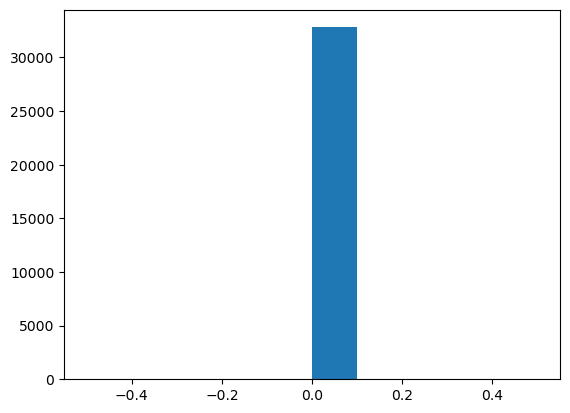

In [196]:
plt.hist(y_pred)
# Count occurrences of zeros
count_zeros = np.count_nonzero(y_pred == 0)
print(f'The number of zeros in the array is: {count_zeros}')

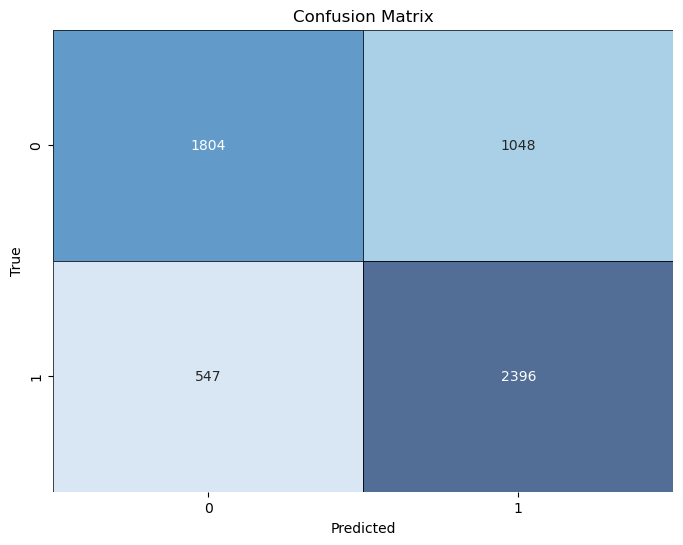

0.750273994050415


In [229]:
# Generate predictions
y_pred = sigmoid(x_te @ w)
y_pred =np.where(y_pred < 0.5, 0, 1) # if below threshold 0 otherwise 1
F1_score = F1_score_f(y_te, y_pred, plot=True)
print(F1_score)
    

In [195]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

ii. K-fold cross validation


  0%|          | 0/5 [00:00<?, ?it/s]

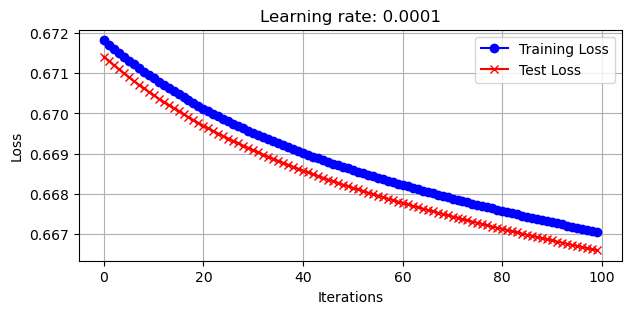

100%|██████████| 5/5 [00:01<00:00,  2.64it/s]


Learning rate = 0.0001; Average train loss = 0.6669605673044348; Average test loss: 0.6669936436525863


  0%|          | 0/5 [00:00<?, ?it/s]

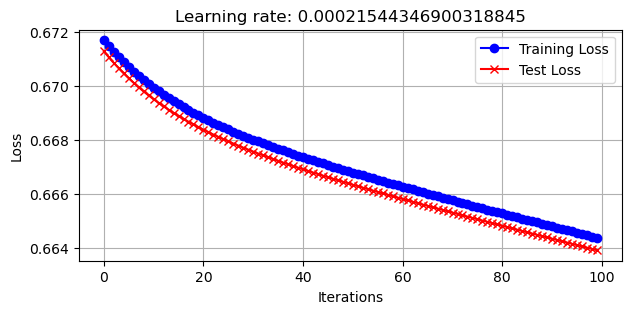

100%|██████████| 5/5 [00:01<00:00,  2.82it/s]


Learning rate = 0.00021544346900318845; Average train loss = 0.6642876582864361; Average test loss: 0.6643355823297358


  0%|          | 0/5 [00:00<?, ?it/s]

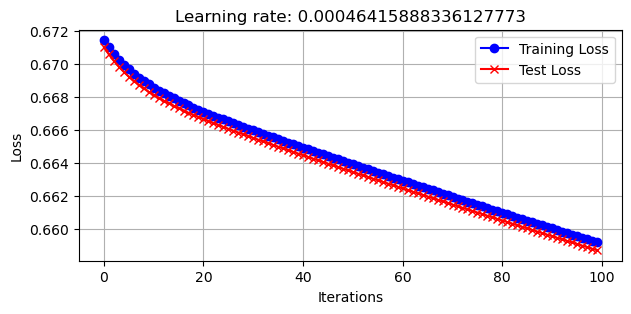

100%|██████████| 5/5 [00:01<00:00,  2.96it/s]


Learning rate = 0.00046415888336127773; Average train loss = 0.6591054849618757; Average test loss: 0.6591654219691507


  0%|          | 0/5 [00:00<?, ?it/s]

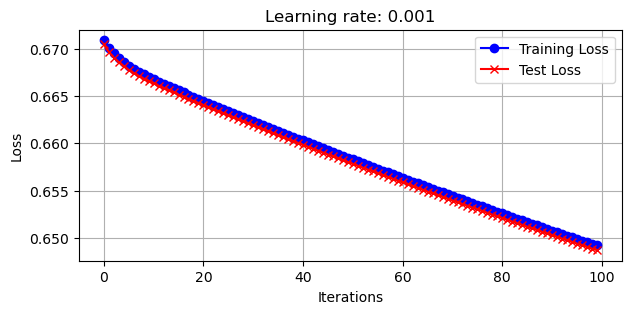

100%|██████████| 5/5 [00:01<00:00,  2.92it/s]


Learning rate = 0.001; Average train loss = 0.6490835114540043; Average test loss: 0.6491530894097349


  0%|          | 0/5 [00:00<?, ?it/s]

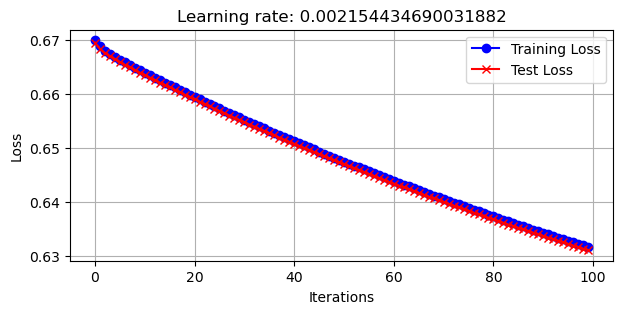

100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


Learning rate = 0.002154434690031882; Average train loss = 0.6315634277352621; Average test loss: 0.6316425617588314


  0%|          | 0/5 [00:00<?, ?it/s]

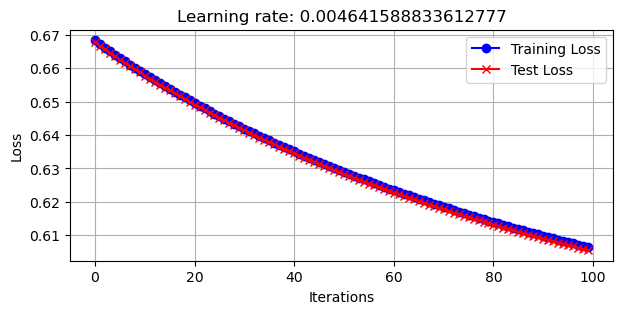

100%|██████████| 5/5 [00:01<00:00,  3.11it/s]


Learning rate = 0.004641588833612777; Average train loss = 0.6061733651984582; Average test loss: 0.6062672023387472


  0%|          | 0/5 [00:00<?, ?it/s]

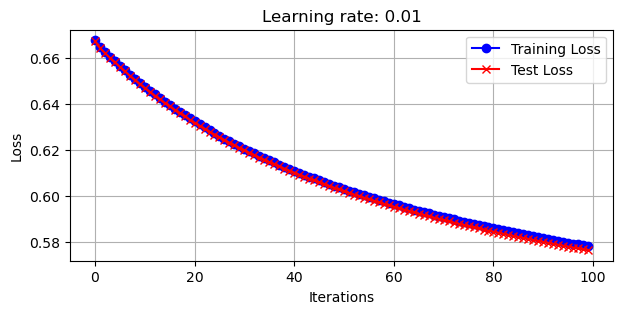

100%|██████████| 5/5 [00:01<00:00,  2.85it/s]


Learning rate = 0.01; Average train loss = 0.5774980966394587; Average test loss: 0.5776131604138826


  0%|          | 0/5 [00:00<?, ?it/s]

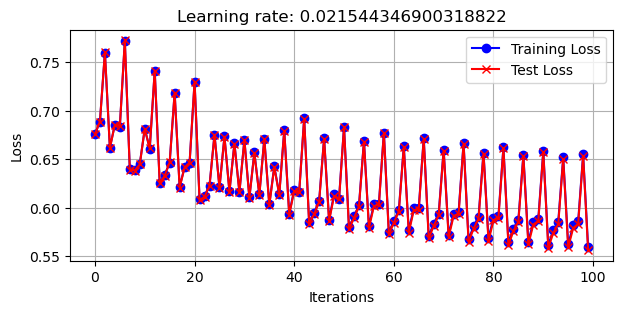

100%|██████████| 5/5 [00:01<00:00,  2.94it/s]


Learning rate = 0.021544346900318822; Average train loss = 0.572817798609673; Average test loss: 0.5724581628166335


  0%|          | 0/5 [00:00<?, ?it/s]

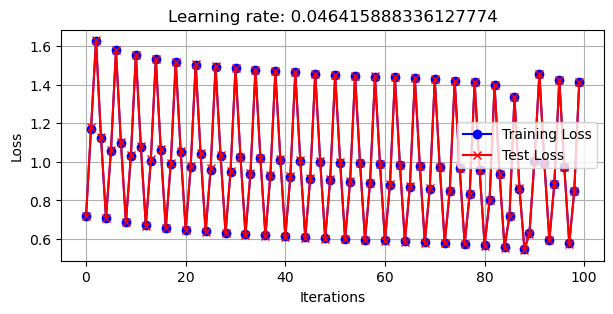

100%|██████████| 5/5 [00:01<00:00,  2.93it/s]


Learning rate = 0.046415888336127774; Average train loss = 1.1982283758372052; Average test loss: 1.192265554215464


  0%|          | 0/5 [00:00<?, ?it/s]

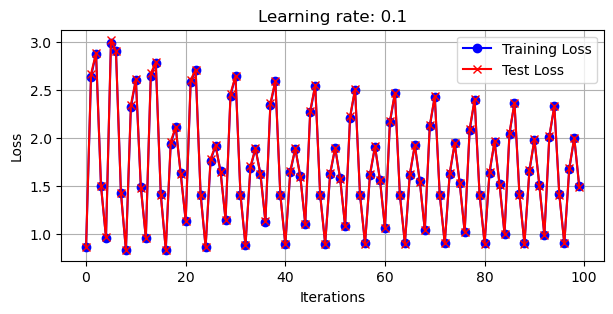

100%|██████████| 5/5 [00:01<00:00,  2.63it/s]

Learning rate = 0.1; Average train loss = 1.4917056492796656; Average test loss: 1.4914595552038477
{0.021544346900318822: 0.5724581628166335, 0.01: 0.5776131604138826, 0.004641588833612777: 0.6062672023387472, 0.002154434690031882: 0.6316425617588314, 0.001: 0.6491530894097349, 0.00046415888336127773: 0.6591654219691507, 0.00021544346900318845: 0.6643355823297358, 0.0001: 0.6669936436525863, 0.046415888336127774: 1.192265554215464, 0.1: 1.4914595552038477}
Best learning rate: 0.0001 with test MSE: 0.6669936436525863


In [135]:

# Initial weights
p = 11 # number of selected parameters
initial_w =  np.random.rand(p) * 0.01  # Small random values
max_iters = 100
gammas = np.logspace(-4, -1,10)
K = 5 # define number of fold
seed = 12
# split data in k fold - data split into k groups
k_indices = build_k_indices(y, K, seed) 
# define lists to store the loss of training data and test data
loss_tr_list = []
loss_te_list = []
# ***************************************************
# For each lambda, divide dataset into k folds -> compute error corresponding to each and average
for gamma in gammas:
    loss_tr = 0
    loss_te = 0
    for k in tqdm(range(0,K)):
        losses_tr, losses_te, w = cross_validation(y, X, k_indices, k, initial_w, max_iters, gamma)
        if k ==0:
            plot_loss_iter(losses_train=losses_tr, losses_test=losses_te, max_iters=max_iters, gamma=gamma)
        loss_tr += losses_tr[max_iters -1]
        loss_te += losses_te[max_iters -1]
  
    # Average for all k, for each gamma
    # Once all errors are computed average them and append to lists
    loss_tr_list.append(loss_tr/K)
    loss_te_list.append(loss_te/K)
    print(f'Learning rate = {gamma}; Average train loss = {loss_tr/K}; Average test loss: {loss_te/K}')
    

# Create a dictionary that pairs lambda with corresponding training and test RMSEs
gamma_mse_dict = {gammas[i]: loss_te_list[i] for i in range(len(gammas))}
# Sort the dictionary by test RMSE ; item: pair (key, value) -> Need to sort by second item then
sorted_gamma_mse = dict(sorted(gamma_mse_dict.items(), key=lambda item: item[1]))
# Take first value
print(sorted_gamma_mse)
best_lambda, best_mse =  list(sorted_gamma_mse.items())[0]
print(f'Best learning rate: {best_lambda} with test MSE: {best_mse}')